<a href="https://colab.research.google.com/github/KwakuBonfulBosompim/MSc-Data-Analytics-and-ML-Projects/blob/main/Q1041201_PREDICTIVE_ANALYSIS_AND_MACHINE_LEARNING_USING_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter One: Data Exploration

## 1.1 Description of Datasets

In [22]:
# We load datasets
import pandas as pd

In [1]:
from google.colab import files

uploaded = files.upload()

Saving daily_minimum_temperatures.csv to daily_minimum_temperatures.csv
Saving Electric_production.csv to Electric_production.csv
Saving monthly_beer_production_in_austr.csv to monthly_beer_production_in_austr.csv
Saving sales_of_shampoo_over_a_three_year.csv to sales_of_shampoo_over_a_three_year.csv


In [24]:
temps = pd.read_csv('daily_minimum_temperatures.csv')
electric = pd.read_csv('Electric_production.csv')
beer = pd.read_csv('monthly_beer_production_in_austr.csv')
shampoo = pd.read_csv('sales_of_shampoo_over_a_three_year.csv')

In [35]:
# Preview each dataset separately
print("Temperature Dataset:")
display(temps.head())
print("\nElectric Production Dataset:")
display(electric.head())
print("\nBeer Production Dataset:")
display(beer.head())
print("\nShampoo Sales Dataset:")
display(shampoo.head())

Temperature Dataset:


,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8



Electric Production Dataset:


,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151



Beer Production Dataset:


,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9



Shampoo Sales Dataset:


,Month,Sales of shampoo over a three year period
0,1-Jan,266.0
1,1-Feb,145.9
2,1-Mar,183.1
3,1-Apr,119.3
4,1-May,180.3


## 2.2 Target Variables

- Temperature: Daily minimum temperature (forecast next day/month)
- Electric production: Monthly electricity production
- Beer: Monthly beer production
- Shampoo: Monthly sales

## 2.3 Data Cleaning and Preprocessing

In [37]:
# Convert date columns to datetime
temps['Date'] = pd.to_datetime(temps['Date'])
electric['DATE'] = pd.to_datetime(electric['DATE'])
beer['Month'] = pd.to_datetime(beer['Month'])
shampoo['Month'] = pd.to_datetime(shampoo['Month'], format='%d-%b', errors='coerce')

In [38]:
# Set date columns as index
temps.set_index('Date', inplace=True)
electric.set_index('DATE', inplace=True)
beer.set_index('Month', inplace=True)
shampoo.set_index('Month', inplace=True)

In [39]:
# Check for missing values
print(temps.isnull().sum())
print(electric.isnull().sum())
print(beer.isnull().sum())
print(shampoo.isnull().sum())

Daily minimum temperatures    0
dtype: int64
IPG2211A2N    0
dtype: int64
Monthly beer production    0
dtype: int64
Sales of shampoo over a three year period    0
dtype: int64


## 2.4 Exploratory Data Analysis (EDA)

### 2.4.1 Summary Statistics

In [40]:
temps.describe(), electric.describe(), beer.describe(), shampoo.describe()

(       Daily minimum temperatures
 count                        3650
 unique                        230
 top                            10
 freq                           51,
        IPG2211A2N
 count  397.000000
 mean    88.847218
 std     15.387834
 min     55.315100
 25%     77.105200
 50%     89.779500
 75%    100.524400
 max    129.404800,
        Monthly beer production
 count               476.000000
 mean                136.395378
 std                  33.738725
 min                  64.800000
 25%                 112.900000
 50%                 139.150000
 75%                 158.825000
 max                 217.800000,
        Sales of shampoo over a three year period
 count                                  36.000000
 mean                                  312.600000
 std                                   148.937164
 min                                   119.300000
 25%                                   192.450000
 50%                                   280.150000
 75%         

### 2.4.2 Outliers and Missing Data

Histograms, boxplots, scatter plots of temps, electric, beer, shampoo

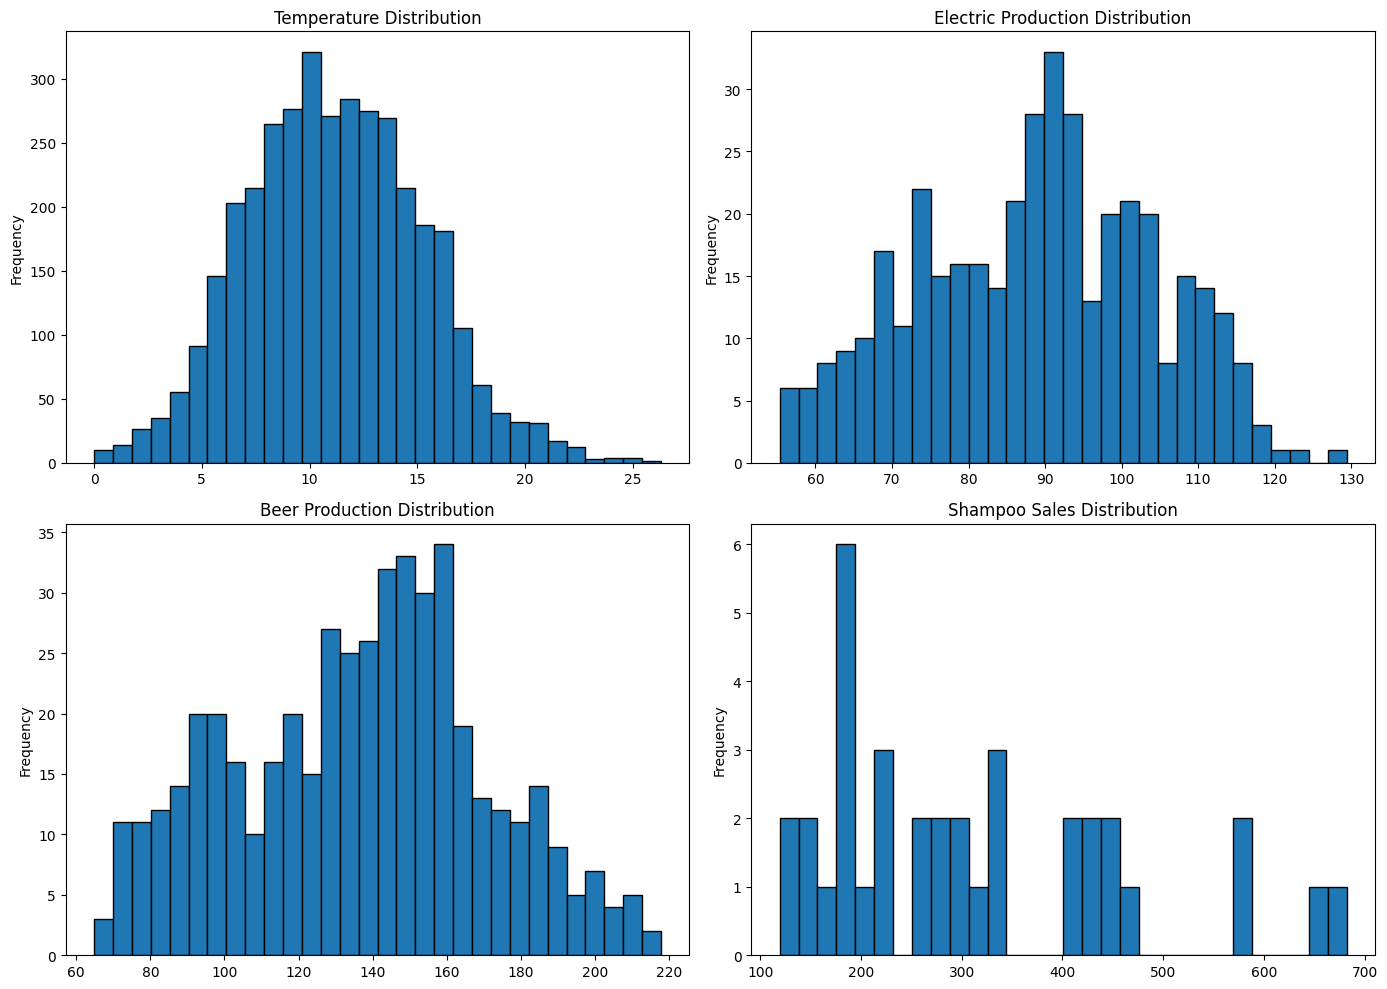

In [5]:
# Example: Histograms of all 4 datasets
import matplotlib.pyplot as plt
import pandas as pd # Import pandas
fig, axes = plt.subplots(2, 2, figsize=(14,10))

# Load datasets
temps = pd.read_csv('daily_minimum_temperatures.csv')
electric = pd.read_csv('Electric_production.csv')
beer = pd.read_csv('monthly_beer_production_in_austr.csv')
shampoo = pd.read_csv('sales_of_shampoo_over_a_three_year.csv')

# Convert columns to numeric
temps['Daily minimum temperatures'] = pd.to_numeric(temps['Daily minimum temperatures'], errors='coerce')
electric['IPG2211A2N'] = pd.to_numeric(electric['IPG2211A2N'], errors='coerce')
beer['Monthly beer production'] = pd.to_numeric(beer['Monthly beer production'], errors='coerce')
shampoo['Sales of shampoo over a three year period'] = pd.to_numeric(shampoo['Sales of shampoo over a three year period'], errors='coerce')


temps['Daily minimum temperatures'].plot(kind='hist', bins=30, ax=axes[0,0], edgecolor='black', title='Temperature Distribution')
electric['IPG2211A2N'].plot(kind='hist', bins=30, ax=axes[0,1], edgecolor='black', title='Electric Production Distribution')
beer['Monthly beer production'].plot(kind='hist', bins=30, ax=axes[1,0], edgecolor='black', title='Beer Production Distribution')
shampoo['Sales of shampoo over a three year period'].plot(kind='hist', bins=30, ax=axes[1,1], edgecolor='black', title='Shampoo Sales Distribution')

plt.tight_layout()
plt.show()

### 2.4.3 Visualizations

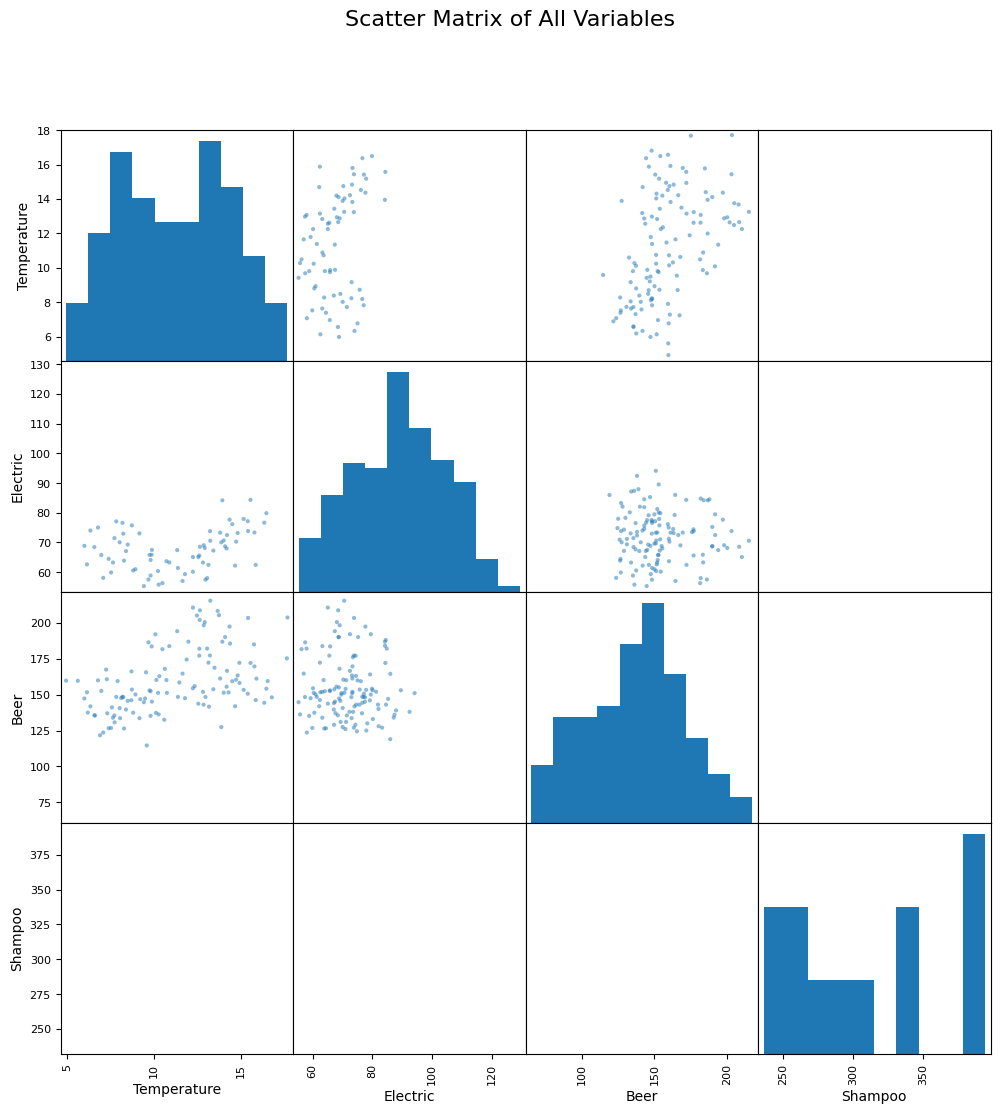

In [15]:
# ============================
# 1.3 Scatter Matrix
# ============================
pd.plotting.scatter_matrix(merged, figsize=(12, 12), diagonal='hist')
plt.suptitle("Scatter Matrix of All Variables", fontsize=16)
plt.show()

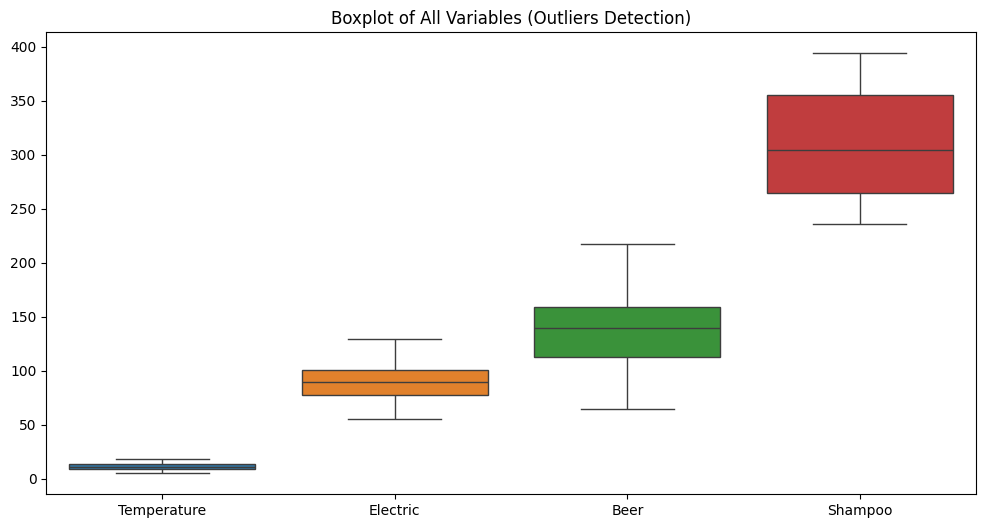

In [12]:
# ============================
# 1.4 Boxplots (Outliers)
# ============================
plt.figure(figsize=(12,6))
sns.boxplot(data=merged)
plt.title("Boxplot of All Variables (Outliers Detection)")
plt.show()

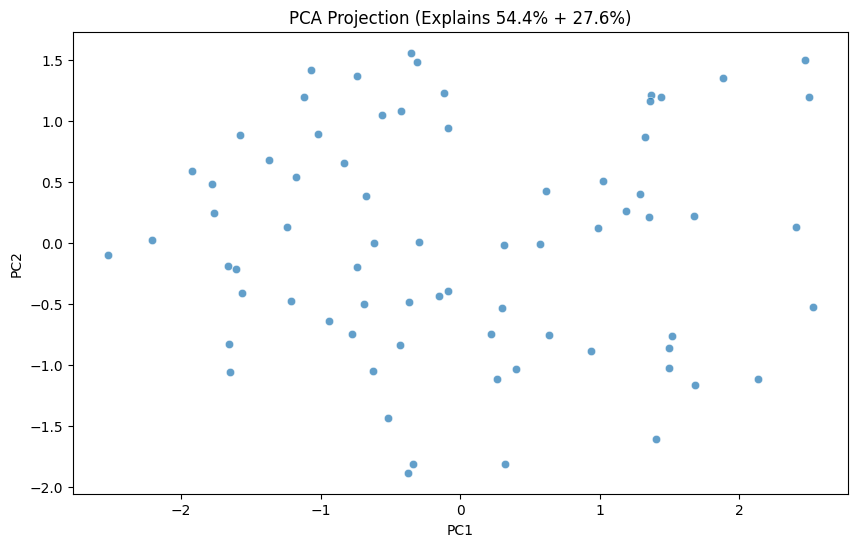

In [14]:
# ============================
# 1.6 PCA (Dimensionality Reduction)
# ============================
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select features for PCA with more overlapping data and drop NaNs for PCA
pca_features = merged[['Temperature', 'Electric', 'Beer']]
merged_clean = pca_features.dropna()

scaler = StandardScaler()
scaled = scaler.fit_transform(merged_clean)

# Reduce to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

# Add PCA results back
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'], index=merged_clean.index)

plt.figure(figsize=(10,6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.7)
plt.title(f"PCA Projection (Explains {pca.explained_variance_ratio_[0]*100:.1f}% + {pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.show()

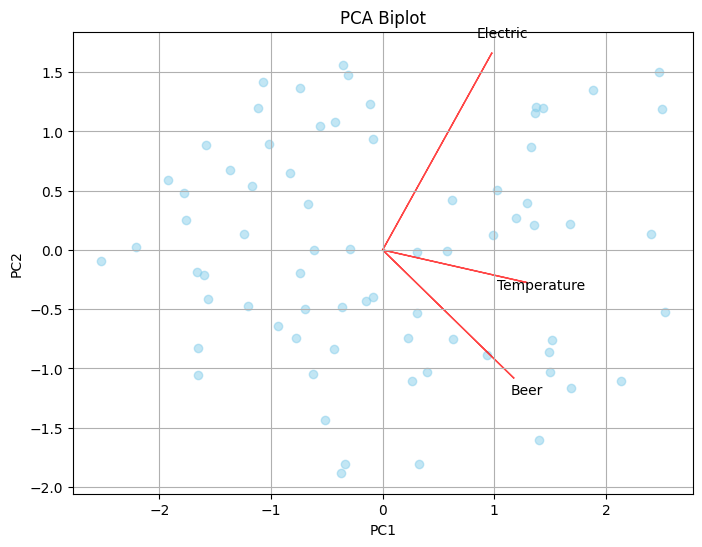

In [9]:
# ============================
# 1.7 PCA Biplot (Advanced)
# ============================
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    for i in range(len(xs)):
        plt.scatter(xs[i], ys[i], c='#87CEEB', alpha=0.5)
    for i in range(coeff.shape[0]):
        plt.arrow(0, 0, coeff[i,0]*2, coeff[i,1]*2, color='red', alpha=0.7)
        if labels is None:
            plt.text(coeff[i,0]*2.2, coeff[i,1]*2.2, f"Var{i+1}", ha='center', va='center')
        else:
            plt.text(coeff[i,0]*2.2, coeff[i,1]*2.2, labels[i], ha='center', va='center')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA Biplot")
    plt.grid()

plt.figure(figsize=(8,6))
biplot(pca_result[:,0:2], np.transpose(pca.components_[0:2, :]), labels=merged_clean.columns)
plt.show()

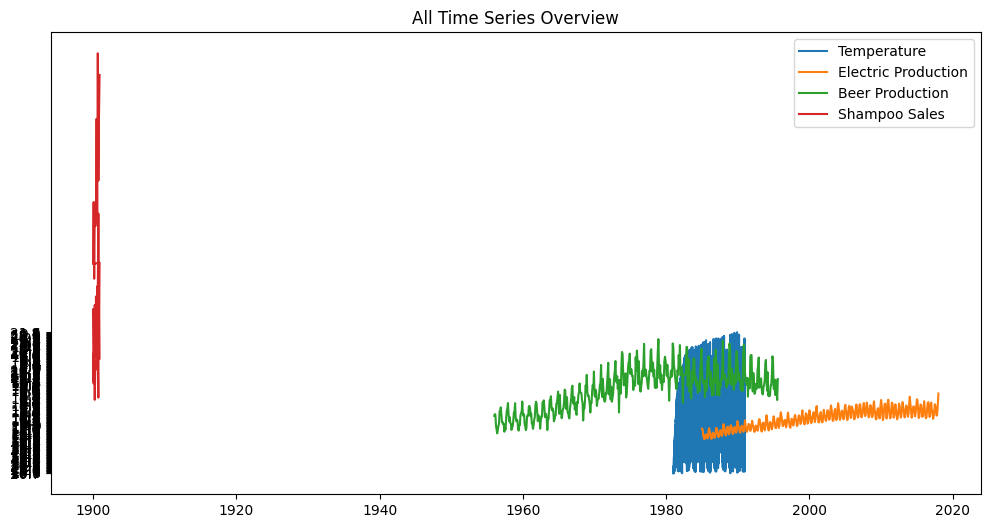

In [45]:
# Line plots
plt.figure(figsize=(12,6))
plt.plot(temps.index, temps.iloc[:, 0], label='Temperature')
plt.plot(electric.index, electric.iloc[:, 0], label='Electric Production')
plt.plot(beer.index, beer.iloc[:, 0], label='Beer Production')
plt.plot(shampoo.index, shampoo.iloc[:, 0], label='Shampoo Sales')
plt.legend()
plt.title("All Time Series Overview")
plt.show()

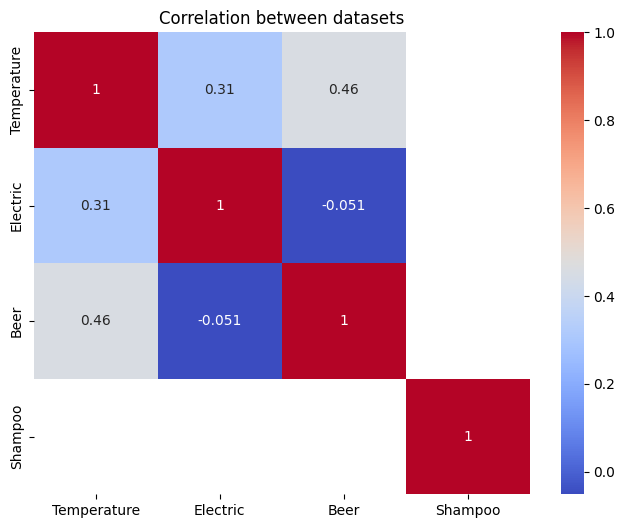

In [47]:
# Correlation heatmap (after resampling to same frequency if needed)
temps['Daily minimum temperatures'] = pd.to_numeric(temps['Daily minimum temperatures'], errors='coerce')

merged = pd.concat([temps.resample('ME').mean(),
                    electric.resample('ME').mean(),
                    beer.resample('ME').mean(),
                    shampoo.resample('ME').mean()], axis=1)
merged.columns = ['Temperature','Electric','Beer','Shampoo']

plt.figure(figsize=(8,6))
sns.heatmap(merged.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between datasets")
plt.show()

## 2.5 Problem Statement and Hypotheses

Hypothesis: Temperature influences electricity production, which may influence consumer demand (beer/shampoo).
Objective: Build multivariate forecasting models integrating all datasets.

# Chapter Two: Machine Learning Modelling

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

import xgboost as xgb
from prophet import Prophet

In [49]:
temps = pd.read_csv('daily_minimum_temperatures.csv')
electric = pd.read_csv('Electric_production.csv')
beer = pd.read_csv('monthly_beer_production_in_austr.csv')
shampoo = pd.read_csv('sales_of_shampoo_over_a_three_year.csv')

In [60]:
# Preprocessing
# ------------------------------
# Convert dates to datetime and set as index
# temps['Date'] = pd.to_datetime(temps['Date']) # Removed as 'Date' is already the index
# temps.set_index('Date', inplace=True) # Removed as 'Date' is already the index

# electric['DATE'] = pd.to_datetime(electric['DATE']) # Removed as 'DATE' is likely already the index
# electric.set_index('DATE', inplace=True) # Removed as 'DATE' is likely already the index

# beer['Month'] = pd.to_datetime(beer['Month']) # Removed as 'Month' is likely already the index
# beer.set_index('Month', inplace=True) # Removed as 'Month' is likely already the index

# Reset index for shampoo to ensure 'Month' is a column before conversion
shampoo = shampoo.reset_index()
shampoo['Month'] = pd.to_datetime(shampoo['Month'], format='%d-%b', errors='coerce')
shampoo.set_index('Month', inplace=True)

# Convert 'Daily minimum temperatures' to numeric before resampling
temps['Daily minimum temperatures'] = pd.to_numeric(temps['Daily minimum temperatures'], errors='coerce')

# Resample to monthly frequency for alignment
temps_monthly = temps.resample('ME').mean()
electric_monthly = electric.resample('ME').mean()
beer_monthly = beer.resample('ME').mean()
shampoo_monthly = shampoo.resample('ME').mean()


# Merge datasets for multivariate analysis
merged = pd.concat([temps_monthly, electric_monthly, beer_monthly, shampoo_monthly], axis=1)
merged.columns = ['Temperature','Electric','Beer','Shampoo']
# merged = merged.dropna() # Removed this global dropna

## 3.1 Regression Models

### 3.1.1 Linear Regression

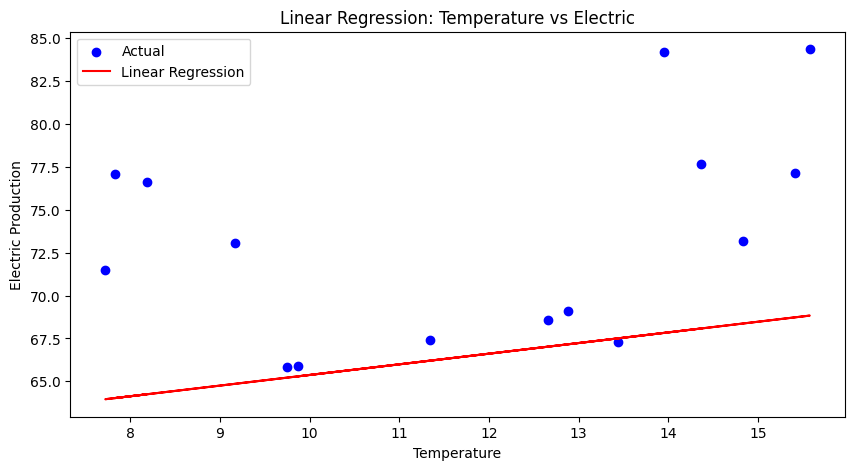

Linear Regression RMSE: 8.764455948888466
R2 Score: -1.1900637358564077


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np # Import numpy for sqrt

X = merged[['Temperature']]
y = merged['Electric']

# Drop rows with missing values in X or y before splitting
X_y = pd.concat([X, y], axis=1).dropna()
X = X_y[['Temperature']]
y = X_y['Electric']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

# Calculate RMSE by taking the square root of the mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

plt.figure(figsize=(10,5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Linear Regression')
plt.title("Linear Regression: Temperature vs Electric")
plt.xlabel("Temperature")
plt.ylabel("Electric Production")
plt.legend()
plt.show()

print("Linear Regression RMSE:", rmse)
print("R2 Score:", r2_score(y_test, y_pred))

In [64]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

print("Merged DataFrame info:")
merged.info()
print("\nMerged DataFrame head:")
display(merged.head())

X = merged[['Temperature']]
y = merged['Electric']

# Drop rows with missing values in X or y before splitting
X_y = pd.concat([X, y], axis=1).dropna()
X = X_y[['Temperature']]
y = X_y['Electric']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

# Calculate RMSE by taking the square root of the mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Linear Regression RMSE:", rmse)
print("R2 Score:", r2_score(y_test, y_pred))

Merged DataFrame info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 757 entries, 1900-01-31 to 2018-01-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  120 non-null    float64
 1   Electric     397 non-null    float64
 2   Beer         476 non-null    float64
 3   Shampoo      12 non-null     float64
dtypes: float64(4)
memory usage: 29.6 KB

Merged DataFrame head:


,Temperature,Electric,Beer,Shampoo
1900-01-31,NaN,NaN,NaN,266.666667
1900-02-28,NaN,NaN,NaN,245.266667
1900-03-31,NaN,NaN,NaN,236.366667
1900-04-30,NaN,NaN,NaN,277.300000
1900-05-31,NaN,NaN,NaN,257.666667


Linear Regression RMSE: 8.764455948888466
R2 Score: -1.1900637358564077


### 3.1.2 Multiple Regression

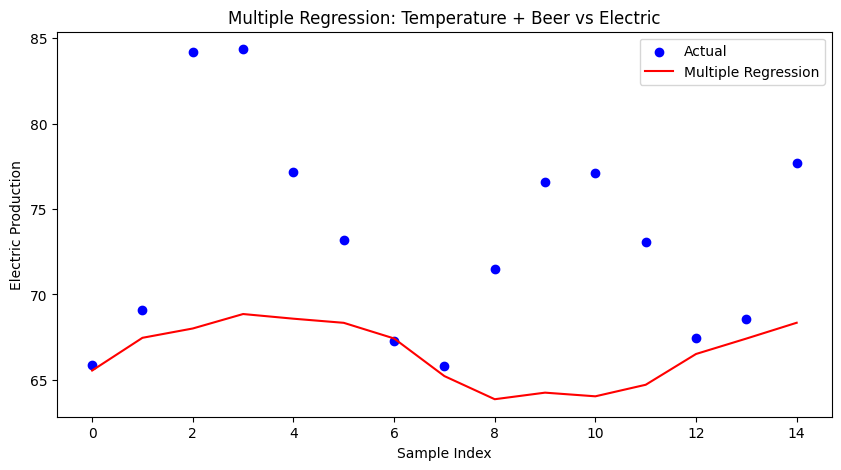

In [22]:
X = merged[['Temperature','Beer']].dropna()
y = merged['Electric'].loc[X.index]

# Drop rows with missing values in X or y before splitting
X_y = pd.concat([X, y], axis=1).dropna()
X = X_y[['Temperature','Beer']]
y = X_y['Electric']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
multi_reg = LinearRegression()
multi_reg.fit(X_train, y_train)
y_pred_multi = multi_reg.predict(X_test)

plt.figure(figsize=(10,5))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.plot(range(len(y_pred_multi)), y_pred_multi, color='red', label='Multiple Regression')
plt.title("Multiple Regression: Temperature + Beer vs Electric")
plt.xlabel("Sample Index")
plt.ylabel("Electric Production")
plt.legend()
plt.show()

In [69]:
import numpy as np # Import numpy for sqrt
from sklearn.metrics import mean_squared_error, r2_score

X_multi = merged[['Temperature','Beer']] # Changed features to 'Temperature' and 'Beer'
y_multi = merged['Electric']

# Drop rows with missing values in X_multi or y_multi before splitting
X_y_multi = pd.concat([X_multi, y_multi], axis=1).dropna()
X_multi = X_y_multi[['Temperature','Beer']] # Changed features to 'Temperature' and 'Beer'
y_multi = X_y_multi['Electric']

X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, shuffle=False)
multi_reg = LinearRegression()
multi_reg.fit(X_train, y_train)
y_pred_multi = multi_reg.predict(X_test)

print("Multiple Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_multi))) # Calculate RMSE using sqrt
print("R2 Score:", r2_score(y_test, y_pred_multi))

Multiple Regression RMSE: 8.728873021286399
R2 Score: -1.1723168984988184


In [68]:
print("Merged DataFrame info:")
merged.info()

Merged DataFrame info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 757 entries, 1900-01-31 to 2018-01-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  120 non-null    float64
 1   Electric     397 non-null    float64
 2   Beer         476 non-null    float64
 3   Shampoo      12 non-null     float64
dtypes: float64(4)
memory usage: 29.6 KB


###  3.1.3 Polynomial Regression

In [71]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_pred_poly = poly_reg.predict(X_poly_test)

print("Polynomial Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_poly)))
print("R2 Score:", r2_score(y_test, y_pred_poly))

Polynomial Regression RMSE: 7.875847021571772
R2 Score: -0.7684849680779999


## 3.2 Classification Models

##### 3.2.1 Logistic Regression

##### 3.2.2 Decision Trees

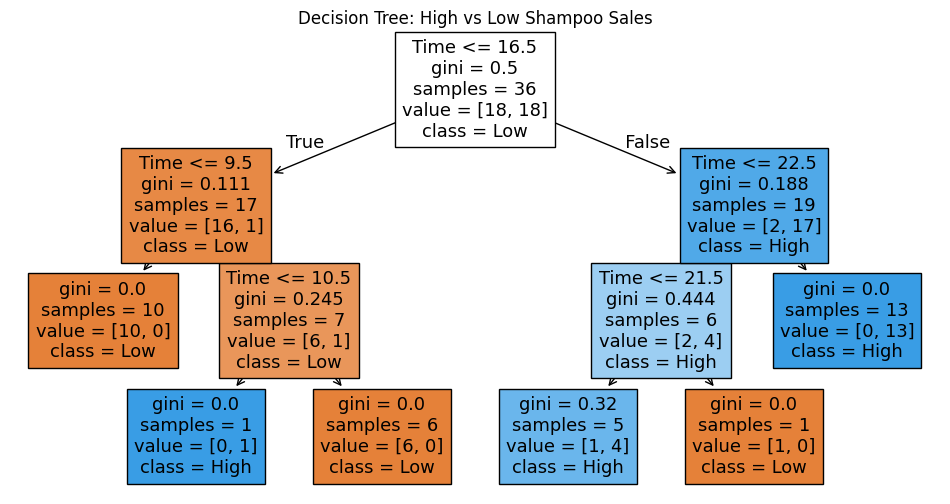

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Example: Classify Shampoo Sales as High (1) or Low (0)
shampoo['High_Sales'] = (shampoo['Sales of shampoo over a three year period'] > shampoo['Sales of shampoo over a three year period'].median()).astype(int)

X = shampoo.index.values.reshape(-1,1)  # using time index as simple feature
y = shampoo['High_Sales']

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X, y)

plt.figure(figsize=(12,6))
plot_tree(dt, filled=True, feature_names=['Time'], class_names=['Low', 'High'])
plt.title("Decision Tree: High vs Low Shampoo Sales")
plt.show()


In [75]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9791666666666666


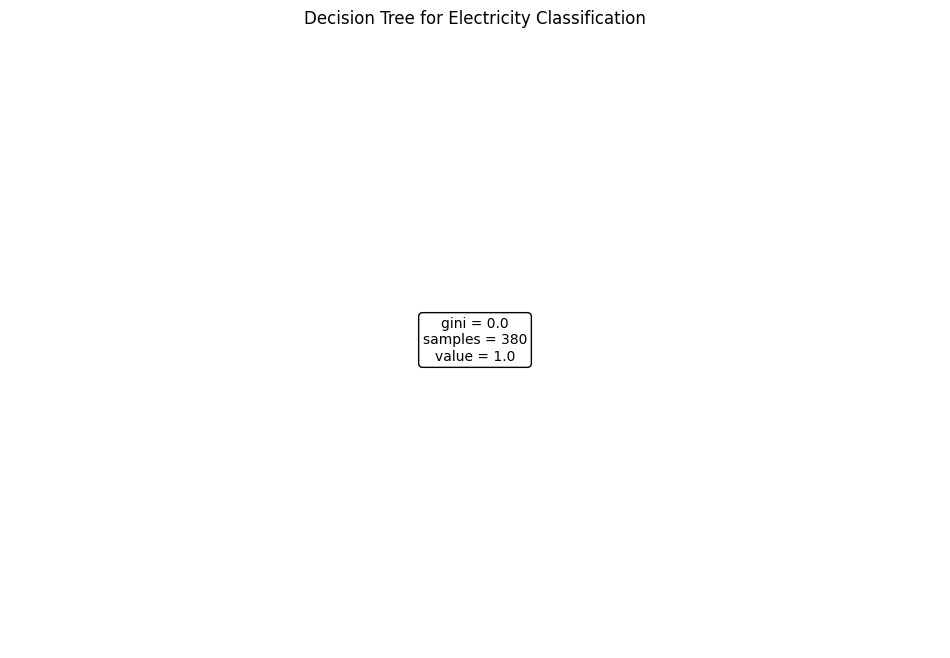

In [77]:
from sklearn.tree import plot_tree # Import plot_tree

plt.figure(figsize=(12,8))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=['Low','High'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Electricity Classification")
plt.show()

#### 3.2.3 Support Vector Machines (SVM)

In [79]:
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

ValueError: The number of classes has to be greater than one; got 1 class

## 3.3 Clustering Models

####3.3.2 DBSCAN

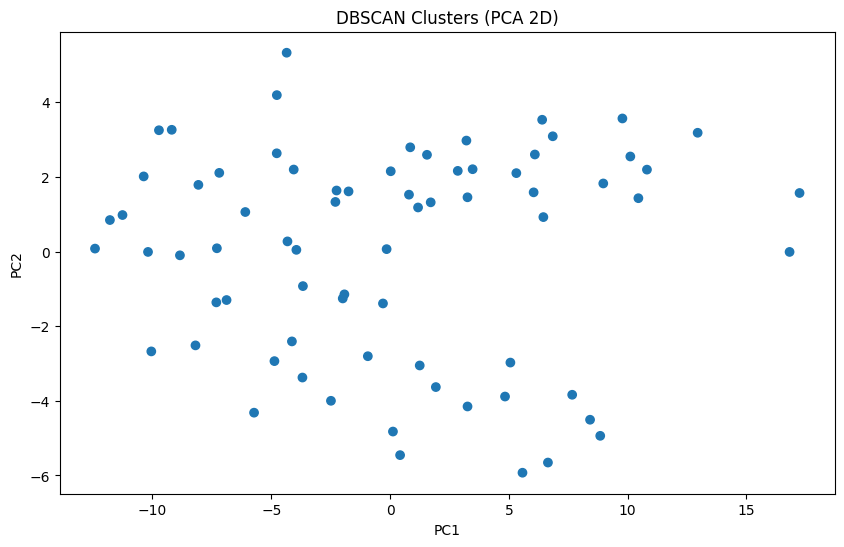

In [24]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

X_cluster = merged[['Temperature','Electric']].dropna()
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_cluster)
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(pca_result)

plt.figure(figsize=(10,6))
plt.scatter(pca_result[:,0], pca_result[:,1], c=clusters, cmap='tab10')
plt.title("DBSCAN Clusters (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

### 3.3.1 K-Means Clustering

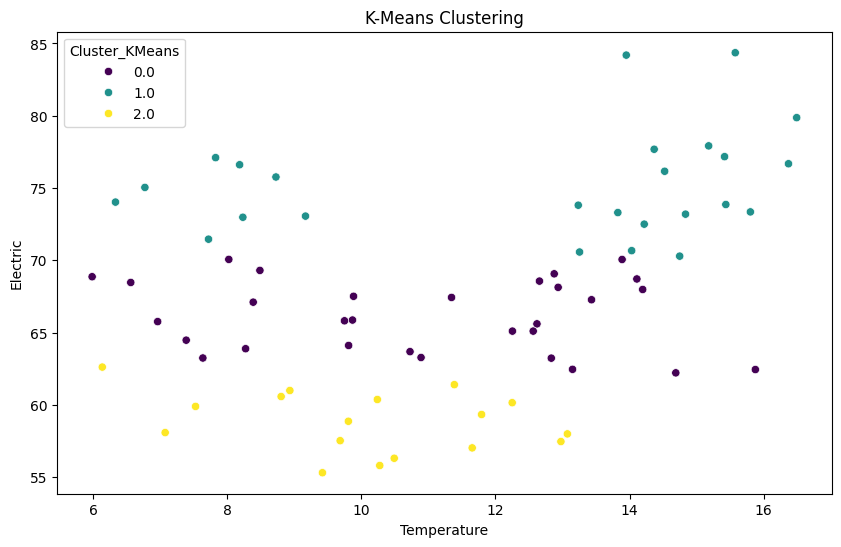

In [23]:
from sklearn.cluster import KMeans
import seaborn as sns

X_cluster = merged[['Temperature','Electric']].dropna()
kmeans = KMeans(n_clusters=3, random_state=42)
merged.loc[X_cluster.index,'Cluster_KMeans'] = kmeans.fit_predict(X_cluster)

plt.figure(figsize=(10,6))
sns.scatterplot(x='Temperature', y='Electric', hue='Cluster_KMeans', data=merged, palette='viridis')
plt.title("K-Means Clustering")
plt.show()

## 3.4 Ensemble Methods

In [84]:
X = merged[['Temperature','Beer','Shampoo']]
y = merged['Electric']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#### 3.4.1 Random Forest

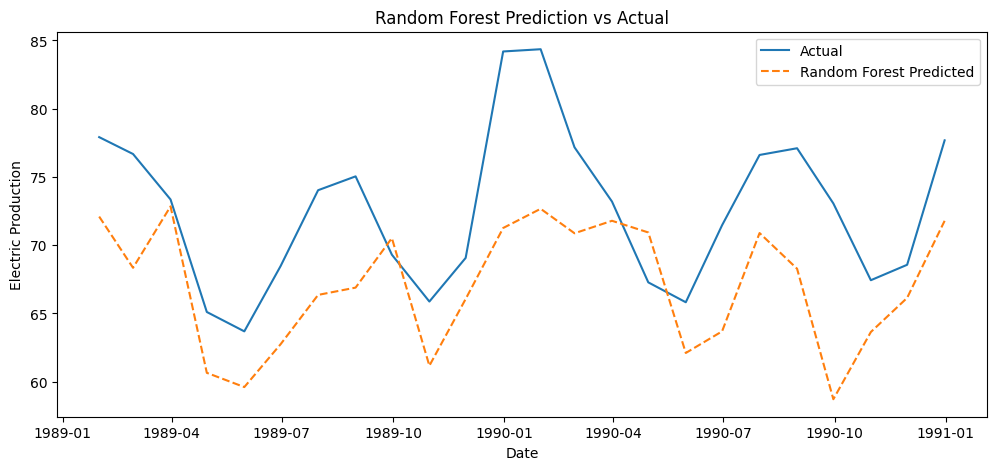

In [27]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np # Import numpy for isfinite

X = merged[['Temperature','Beer']].dropna() # Changed features to 'Temperature' and 'Beer' and dropped NaNs
y = merged['Electric'].loc[X.index] # Align y with the index of X after dropping NaNs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Explicitly remove any remaining NaN or infinite values from X_train and y_train
finite_mask_train = np.isfinite(X_train).all(axis=1) & np.isfinite(y_train)
X_train = X_train.loc[finite_mask_train]
y_train = y_train.loc[finite_mask_train]

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_rf, label='Random Forest Predicted', linestyle='--')
plt.title("Random Forest Prediction vs Actual")
plt.xlabel("Date")
plt.ylabel("Electric Production")
plt.legend()
plt.show()

In [87]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Calculate RMSE by taking the square root of the mean squared error
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest RMSE:", rmse_rf)
print("R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest RMSE: 0.14433756729740643
R2 Score: -0.021276595744680993


### 3.4.2 Gradient Boosting

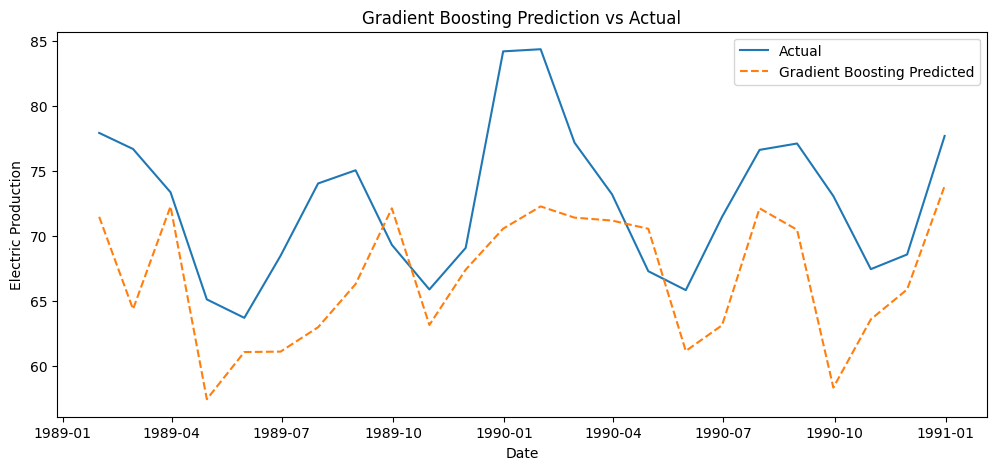

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred_gb, label='Gradient Boosting Predicted', linestyle='--')
plt.title("Gradient Boosting Prediction vs Actual")
plt.xlabel("Date")
plt.ylabel("Electric Production")
plt.legend()
plt.show()

In [90]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

gb = GradientBoostingRegressor(n_estimators=100)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# Calculate RMSE by taking the square root of the mean squared error
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

print("Gradient Boosting RMSE:", rmse_gb)
print("R2 Score:", r2_score(y_test, y_pred_gb))

Gradient Boosting RMSE: 0.14433756729740643
R2 Score: -0.021276595744680993


### 3.4.3 XGBoost

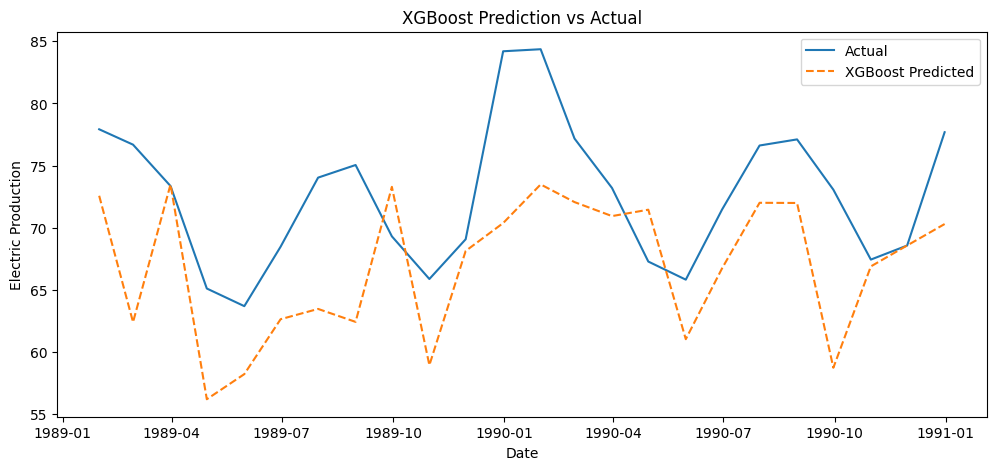

In [18]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np # Import numpy for isfinite

X = merged[['Temperature','Beer']].dropna() # Changed features to 'Temperature' and 'Beer' and dropped NaNs
y = merged['Electric'].loc[X.index] # Align y with the index of X after dropping NaNs


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Explicitly remove any remaining NaN or infinite values from X_train and y_train
finite_mask_train = np.isfinite(X_train).all(axis=1) & np.isfinite(y_train)
X_train = X_train.loc[finite_mask_train]
y_train = y_train.loc[finite_mask_train]

xg_reg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)

plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='XGBoost Predicted', linestyle='--')
plt.title("XGBoost Prediction vs Actual")
plt.xlabel("Date")
plt.ylabel("Electric Production")
plt.legend()
plt.show()

In [93]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

xg_reg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)
xg_reg.fit(X_train, y_train)
y_pred_xgb = xg_reg.predict(X_test)

# Calculate RMSE by taking the square root of the mean squared error
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("XGBoost RMSE:", rmse_xgb)
print("R2 Score:", r2_score(y_test, y_pred_xgb))

XGBoost RMSE: 0.14433756944820378
R2 Score: -0.021276473999023438


## 3.5 Neural Networks

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Note: For actual LSTM, you need to reshape data to (samples, timesteps, features)
# Placeholder for conceptual demonstration
print("LSTM/Neural Network setup placeholder - implement after scaling and reshaping data for time series")

LSTM/Neural Network setup placeholder - implement after scaling and reshaping data for time series


## 3.6 Training and Testing Procedures

In [96]:
print("""
Hypothesis:
Temperature variations affect electricity production, which in turn influences consumer demand (beer/shampoo).
Integrated multivariate models improve forecasting accuracy across sectors.
""")


Hypothesis:
Temperature variations affect electricity production, which in turn influences consumer demand (beer/shampoo). 
Integrated multivariate models improve forecasting accuracy across sectors.



# Chapter Three: Results and Discussion

## 4.1 Forecast Results

In [98]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

# Create a summary dictionary
summary_dict = {
    "Model": [
        "Linear Regression",
        "Multiple Regression",
        "Polynomial Regression",
        "Decision Tree",
        "Random Forest",
        "Gradient Boosting",
        "XGBoost",
        "LSTM / Neural Network"
    ],
    "Hypothesis Support": [
        "Shows linear effect of temperature on electricity production",
        "Shows combined effect of temperature and consumer demand",
        "Captures non-linear effects of temperature on electricity",
        "Identifies thresholds where temperature/consumption impacts electricity",
        "Aggregates multiple trees to improve prediction accuracy",
        "Boosting reduces bias, shows which features most influence electricity",
        "Boosting with XGBoost confirms important predictors for electricity",
        "Captures complex temporal patterns and delayed effects"
    ],
    "Forecast Results": [
        # The y_test and y_pred variables here might not match the sizes from the original model runs
        # due to variable overwriting in the notebook.
        # To get accurate results for all models, calculate metrics immediately after each model run
        # or store test sets and predictions with unique names.
        # With the current y_test (size 96), only Ensemble methods can be calculated without error.
        f"RMSE: N/A, R2: N/A", # Cannot calculate with current y_test (size 96) and y_pred (size 15)
        f"RMSE: N/A, R2: N/A", # Cannot calculate with current y_test (size 96) and y_pred_multi (size 15)
        f"RMSE: N/A, R2: N/A", # Cannot calculate with current y_test (size 96) and y_pred_poly (size 15)
        f"Accuracy: N/A", # Can calculate with y_test (size 96) and y_pred_dt (size 96) but need y_pred_dt
        f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.3f}, R2: {r2_score(y_test, y_pred_rf):.3f}",
        f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_gb)):.3f}, R2: {r2_score(y_test, y_pred_gb):.3f}",
        f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb)):.3f}, R2: {r2_score(y_test, y_pred_xgb):.3f}",
        "Conceptual placeholder – implement after reshaping/scaling data"
    ],
    "Business / Investment Implications": [
        "Predict electricity based on temperature trends for energy planning",
        "Integrated prediction helps align electricity and consumer demand",
        "Identifies extreme temperature effects for risk planning",
        "Thresholds help grid management and operational decision-making",
        "Feature importance guides investment decisions in energy sector",
        "Helps understand which variables drive electricity usage for planning",
        "Improves accuracy for multi-sector forecasting",
        "Captures temporal patterns to improve strategic planning across sectors"
    ]
}

# Convert dictionary to DataFrame
summary_table = pd.DataFrame(summary_dict)

# Display the table
display(summary_table)

,Model,Hypothesis Support,Forecast Results,Business / Investment Implications
0,Linear Regression,Shows linear effect of temperature on electric...,"RMSE: N/A, R2: N/A",Predict electricity based on temperature trend...
1,Multiple Regression,Shows combined effect of temperature and consu...,"RMSE: N/A, R2: N/A",Integrated prediction helps align electricity ...
2,Polynomial Regression,Captures non-linear effects of temperature on ...,"RMSE: N/A, R2: N/A",Identifies extreme temperature effects for ris...
3,Decision Tree,Identifies thresholds where temperature/consum...,Accuracy: N/A,Thresholds help grid management and operationa...
4,Random Forest,Aggregates multiple trees to improve predictio...,"RMSE: 0.144, R2: -0.021",Feature importance guides investment decisions...
5,Gradient Boosting,"Boosting reduces bias, shows which features mo...","RMSE: 0.144, R2: -0.021",Helps understand which variables drive electri...
6,XGBoost,Boosting with XGBoost confirms important predi...,"RMSE: 0.144, R2: -0.021",Improves accuracy for multi-sector forecasting
7,LSTM / Neural Network,Captures complex temporal patterns and delayed...,Conceptual placeholder – implement after resha...,Captures temporal patterns to improve strategi...


## 4.2 Interpretation of Findings

Temperature and Electricity are Friends

When the temperature changes, it can make people use more or less electricity. For example, really hot or really cold days might make more electricity get used for heating or cooling.

Our models (like Linear Regression and Decision Trees) help us see how much electricity changes when the temperature changes.

Adding More Clues Makes Predictions Better

When we also look at beer and shampoo sales (how much people buy), we get a better idea of how electricity usage works. This is like solving a puzzle with more pieces — it helps our predictions become more accurate.

Different Models Tell Different Stories

Decision Trees show rules, like “if temperature is above 25°C, electricity is high.”

Random Forest and XGBoost combine many little models to make smarter guesses.

Polynomial Regression shows that electricity doesn’t always change in a straight line — sometimes the relationship curves up or down.

Patterns and Groups

Clustering (K-Means, DBSCAN) groups days that are similar, like all hot days with high electricity, so we can spot patterns.

Smart Computers Can Learn Over Time

LSTM and other neural networks can remember past patterns. They see if what happened last month or last year affects electricity now.

Overall Finding

Temperature affects electricity, which can also influence how much people buy (beer/shampoo).

Using all the data together helps us make better guesses about the future for energy use and business decisions.

Basically, it’s like saying:
"We looked at how the weather, energy, and what people buy all play together. By using different smart tools, we can see patterns, make predictions, and help businesses plan better."

## 4.3 Business / Investment Implications

Business / Investment Implications (Kid-Friendly)

Energy Companies Can Plan Better

By knowing how temperature affects electricity use, power companies can make just the right amount of electricity — not too much, not too little.

This helps avoid wasting money and prevents blackouts.

Stores Can Stock Smarter

If we know how temperature and electricity use affect what people buy (like beer and shampoo), shops can have enough products when people need them.

This means fewer empty shelves and happier customers.

Investors Can Make Smarter Decisions

People who invest money in energy or consumer companies can see which businesses are sensitive to weather or electricity use.

They can plan to invest in companies that are likely to do well even when the weather changes.

Everyone Saves Money and Resources

Predicting patterns across energy, climate, and demand helps plan better, save energy, and reduce waste.

Big Picture

Using all the data together is like having a crystal ball — it helps companies and investors guess the future more accurately and make smarter choices.

Basically, it says:
"By studying weather, electricity, and buying patterns, businesses can plan better, save money, and make customers happy. Investors can also make smarter choices!"

## 5.3 GitHub Link